In [8]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

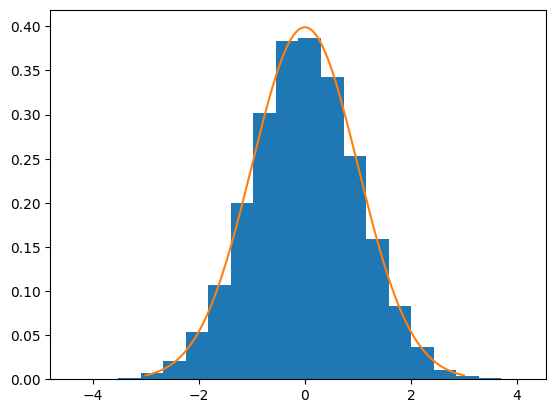

In [10]:
def normal(x,mu,sigma):
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator
#the function gives output normal distribution N(mu.sigma^2)

def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    #the function randomly generates 0 and 1 dependending on the value of p
    
def gaussian_mcmc(hops,mu,sigma):
    states = [] #it stores the random variables in the markov chain(no. of iterations)
    burn_in = int(hops*0.2) #the no. of states after which the distribution of random variable converges to p(x)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu,5*sigma+mu) #movement=Xt+1
        
        curr_prob = normal(x=current,mu=mu,sigma=sigma) #f(Xt)
        move_prob = normal(x=movement,mu=mu,sigma=sigma) #f(X(t+1))
        
        acceptance = min(move_prob/curr_prob,1) #acceptance = min((f(X(t+1)/f(Xt))))
        if random_coin(acceptance):
            current = movement
    return states[burn_in:]
    
lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000,mu=0,sigma=1)
plt.hist(dist,density=1,bins=20) 
plt.plot(lines,normal_curve)